<a href="https://colab.research.google.com/github/RickyBandi/EXPLAINABLE-AI/blob/main/LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset (you supplied)
DATA_PATH = '/content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/Lab_Exam_Data.csv'

# Install required libraries (run once)
!pip install -q imbalanced-learn xgboost shap lime pdpbox

# Common imports and helper utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Helper: concise metric printer (works for binary/multiclass)
def print_metrics(y_true, y_pred, y_proba=None):
    avg = 'binary' if len(np.unique(y_true))==2 else 'weighted'
    print("Accuracy:", round(accuracy_score(y_true, y_pred),4))
    print("Precision:", round(precision_score(y_true, y_pred, average=avg, zero_division=0),4))
    print("Recall:", round(recall_score(y_true, y_pred, average=avg, zero_division=0),4))
    print("F1-score:", round(f1_score(y_true, y_pred, average=avg, zero_division=0),4))
    if y_proba is not None:
        try:
            if y_proba.ndim==2 and y_proba.shape[1]==2:
                roc = roc_auc_score(y_true, y_proba[:,1])
            else:
                roc = roc_auc_score(y_true, y_proba, multi_class='ovr')
            print("ROC-AUC:", round(roc,4))
        except Exception:
            pass

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.8 MB/s eta 0:00:00


Loaded: /content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/Lab_Exam_Data.csv
Shape: (43746, 80)


Description         Name  year iso_code  population  gdp  cement_co2  \
0     Country  Afghanistan  1850      AFG   3752993.0  NaN         0.0   
1     Country  Afghanistan  1851      AFG   3767956.0  NaN         0.0   
2     Country  Afghanistan  1852      AFG   3783940.0  NaN         0.0   
3     Country  Afghanistan  1853      AFG   3800954.0  NaN         0.0   
4     Country  Afghanistan  1854      AFG   3818038.0  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  ...  share_global_other_co2  \
0                    0.0  NaN             NaN  ...                     NaN   
1                    0.0  NaN             NaN  ...                     NaN   
2                    0.0  NaN             NaN  ...                     NaN   
3                    0.0  NaN             NaN  ...                     NaN   
4                    0.0  NaN             NaN  ...                     NaN   

   share_of_temperature_change_from_ghg  temperature_change_from_ch4  \
0                                   NaN                          NaN   
1                                 0.156                          0.0   
2                                 0.155                          0.0   
3                                 0.155                          0.0   
4                                 0.155                          0.0   

   temperature_change_from_co2  temperature_change_from_ghg  \
0                          NaN                          NaN   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   temperature_change_from_n2o  total_ghg  total_ghg_excluding_lucf  \
0                          NaN      7.436                     0.629   
1                          0.0      7.500                     0.633   
2                          0.0      7.560                     0.637   
3                          0.0      7.620                     0.641   
4                          0.0      7.678                     0.644   

   trade_co2  trade_co2_share  
0        NaN              NaN  
1        NaN              NaN  
2        NaN              NaN  
3        NaN              NaN  
4        NaN              NaN  

[5 rows x 80 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                                   37921 non-null  object 
 4   population                                 37965 non-null  float64
 5   gdp                                        14989 non-null  float64
 6   cement_co2                                 23612 non-null  float64
 7   cement_co2_per_capita                      22715 non-null  float64
 8   co2                                        27059 non-null  float64
 9   co2_growth_abs                             24987 non-null  float64
 10  co2_growth_prct       

None

count unique          top   freq  \
Description                    43746      5      Country  34451   
Name                           43746    253  Afghanistan    174   
year                         43746.0    NaN          NaN    NaN   
iso_code                       37921    218          AFG    174   
population                   37965.0    NaN          NaN    NaN   
...                              ...    ...          ...    ...   
temperature_change_from_n2o  38060.0    NaN          NaN    NaN   
total_ghg                    37410.0    NaN          NaN    NaN   
total_ghg_excluding_lucf     37236.0    NaN          NaN    NaN   
trade_co2                     4535.0    NaN          NaN    NaN   
trade_co2_share               4535.0    NaN          NaN    NaN   

                                        mean               std       min  \
Description                              NaN               NaN       NaN   
Name                                     NaN               NaN       NaN   
year                             1936.641727         50.243385    1850.0   
iso_code                                 NaN               NaN       NaN   
population                   57394810.214908  330177858.635985     215.0   
...                                      ...               ...       ...   
temperature_change_from_n2o         0.000509          0.003043       0.0   
total_ghg                         488.542225        2392.57991   -14.961   
total_ghg_excluding_lucf          316.133529       1839.602293       0.0   
trade_co2                          -7.232399        250.640012 -2195.952   
trade_co2_share                     20.52444         52.744956   -98.849   

                                  25%        50%        75%           max  
Description                       NaN        NaN        NaN           NaN  
Name                              NaN        NaN        NaN           NaN  
year                           1893.0     1937.0     1980.0        2023.0  
iso_code                          NaN        NaN        NaN           NaN  
population                   332476.0  2432030.0  9670886.0  8091734935.0  
...                               ...        ...        ...           ...  
temperature_change_from_n2o       0.0        0.0        0.0         0.085  
total_ghg                       1.835    15.0075   78.24275     53816.852  
total_ghg_excluding_lucf        0.235      2.371    29.3375     44114.785  
trade_co2                     -3.1795      1.518     9.1535      1798.999  
trade_co2_share                -6.168      8.701     32.666       568.635  

[80 rows x 11 columns]

Missing values per column:


Description                        0
Name                               0
year                               0
iso_code                        5825
population                      5781
                               ...  
temperature_change_from_n2o     5686
total_ghg                       6336
total_ghg_excluding_lucf        6510
trade_co2                      39211
trade_co2_share                39211
Length: 80, dtype: int64


Data types:


Description                     object
Name                            object
year                             int64
iso_code                        object
population                     float64
                                ...   
temperature_change_from_n2o    float64
total_ghg                      float64
total_ghg_excluding_lucf       float64
trade_co2                      float64
trade_co2_share                float64
Length: 80, dtype: object

Numeric: ['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'oi

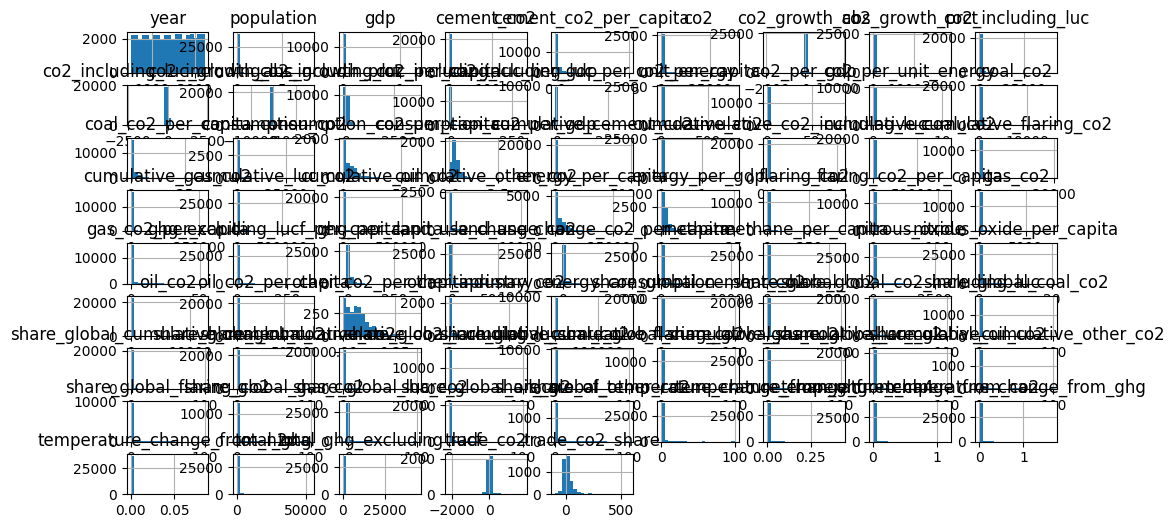

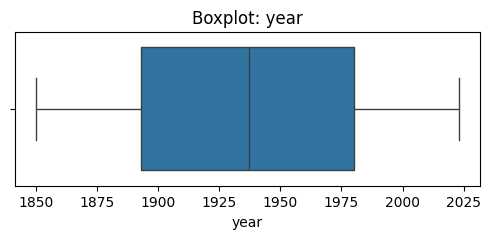

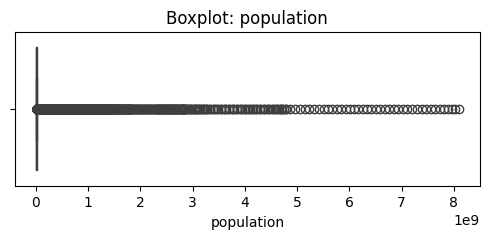

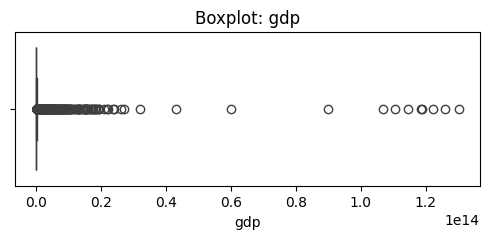

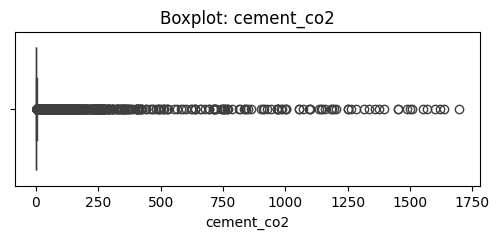

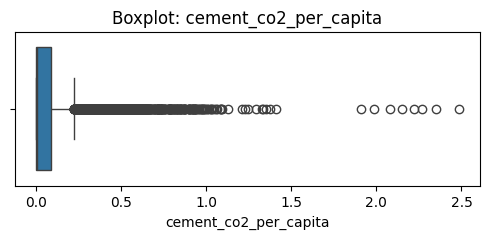

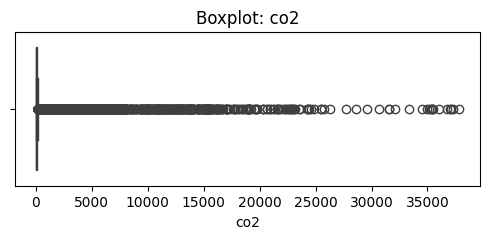

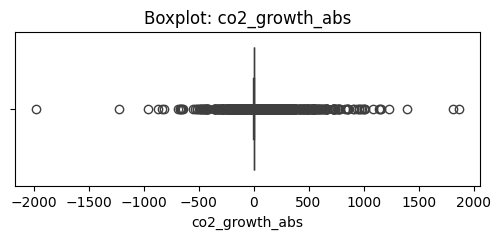

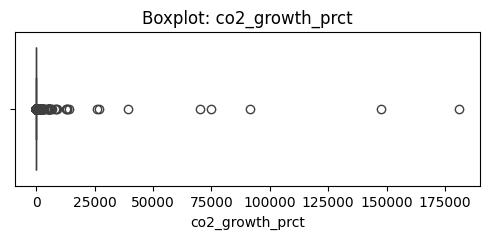

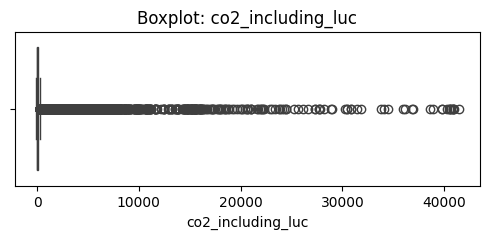

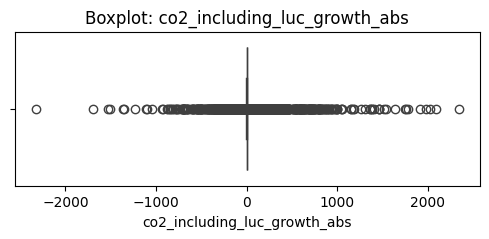

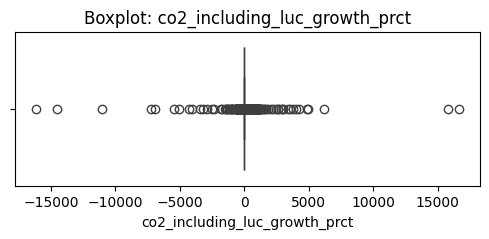

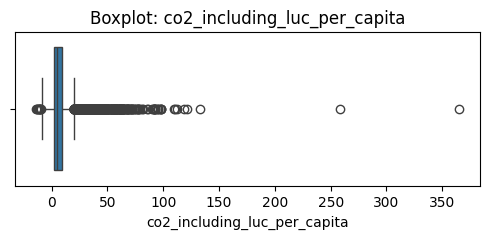

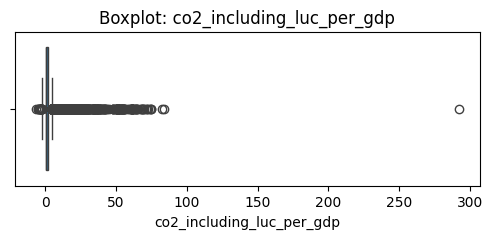

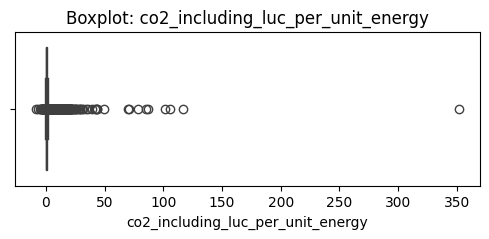

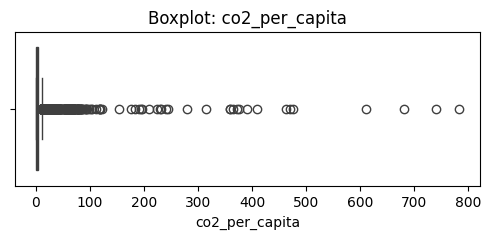

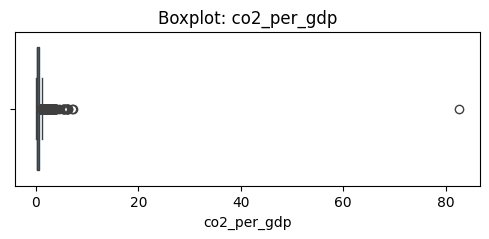

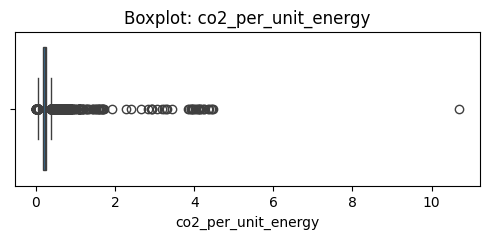

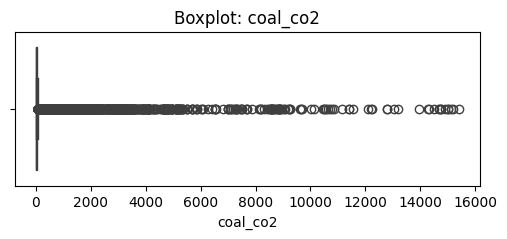

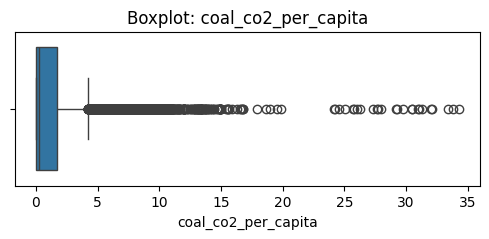

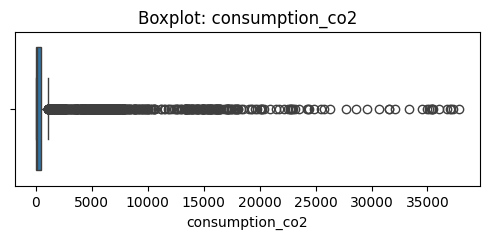

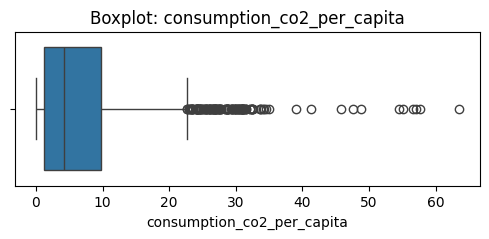

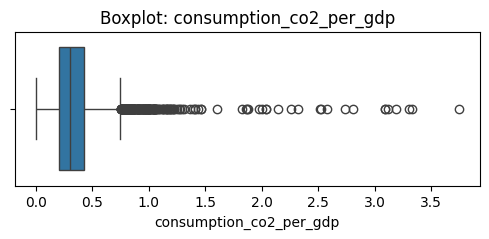

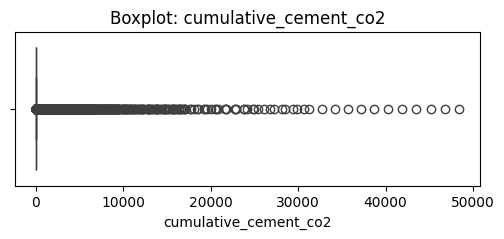

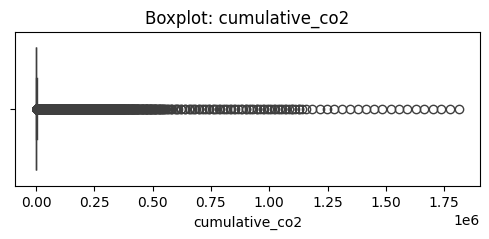

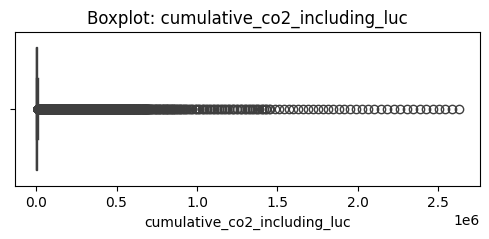

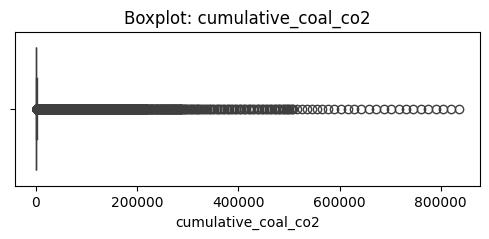

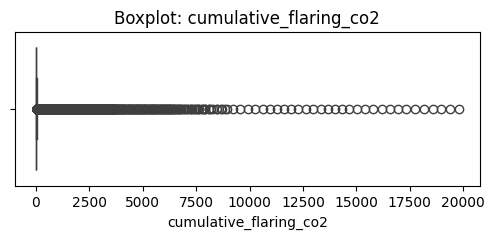

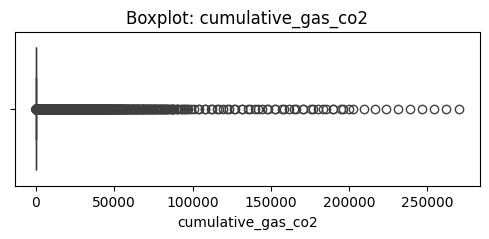

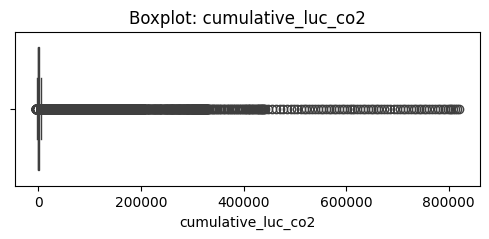

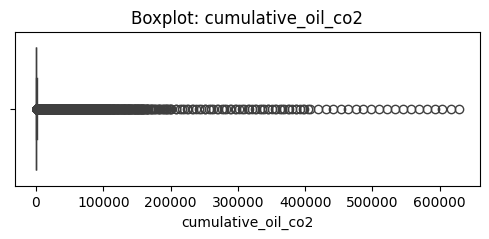

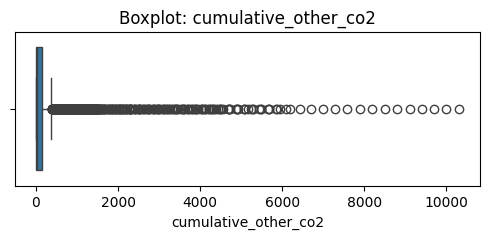

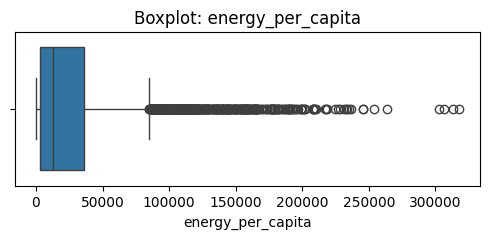

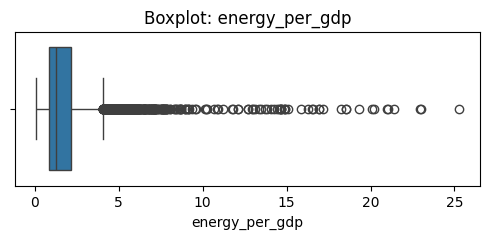

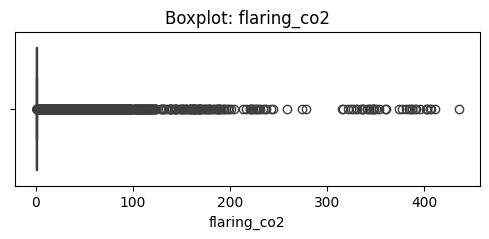

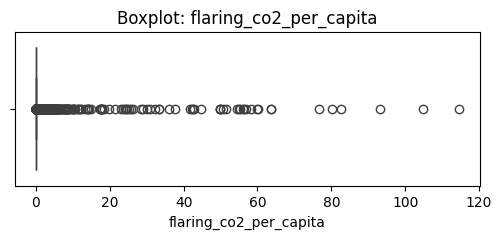

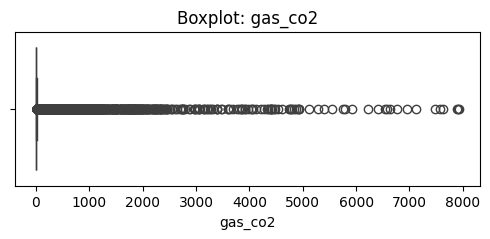

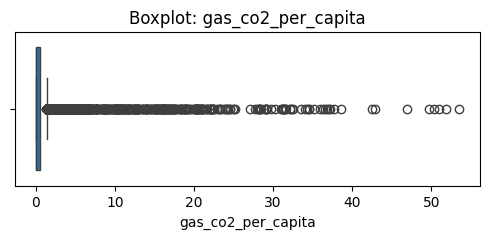

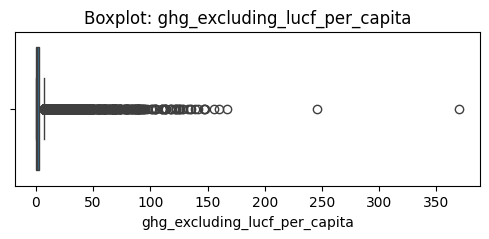

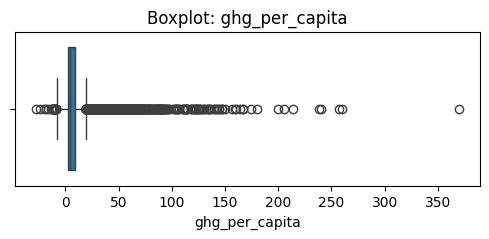

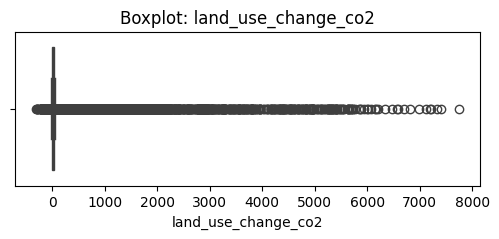

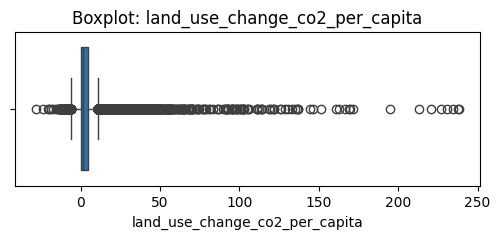

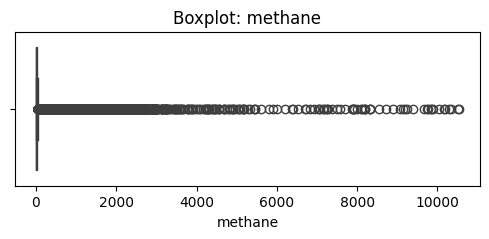

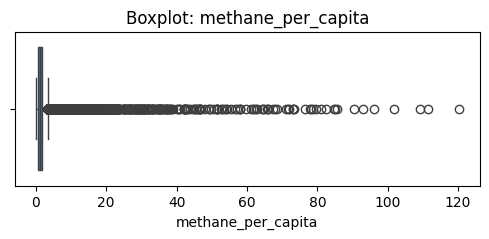

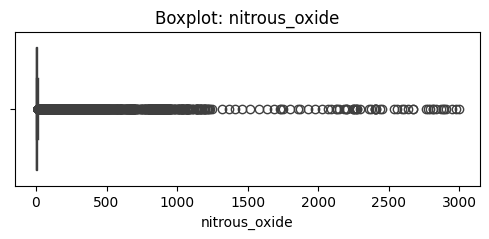

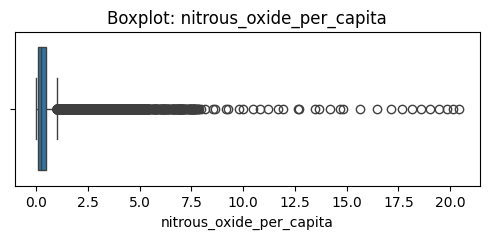

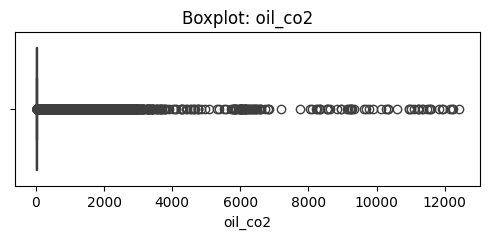

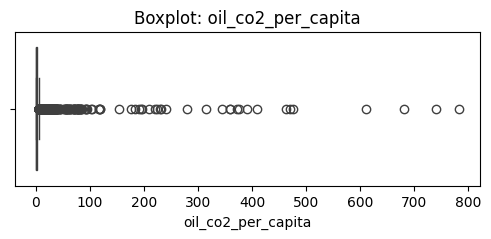

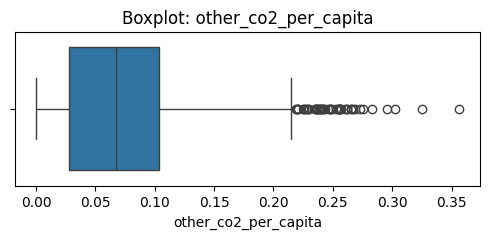

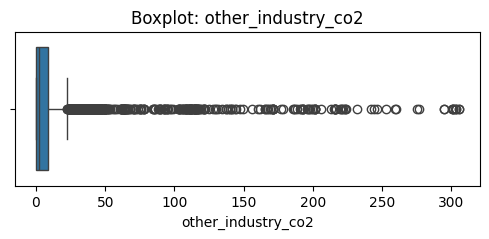

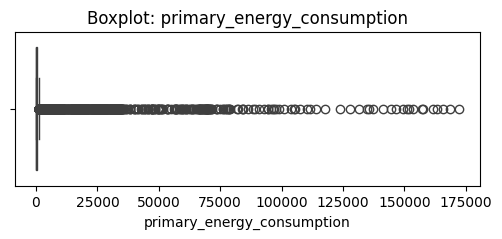

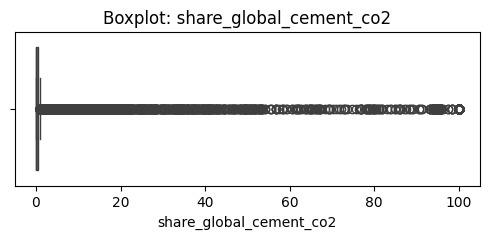

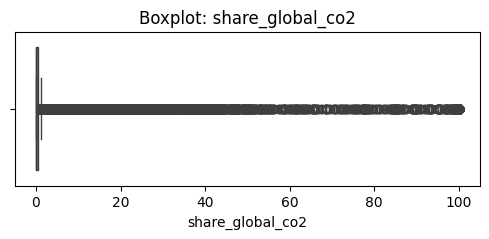

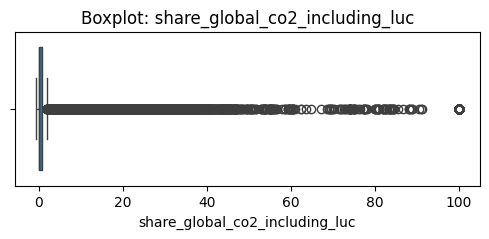

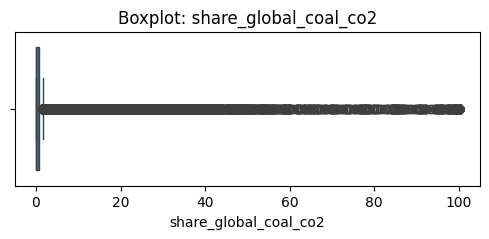

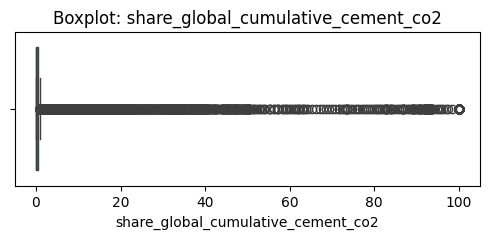

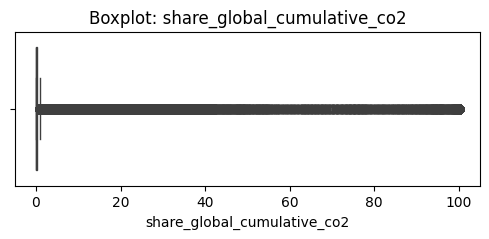

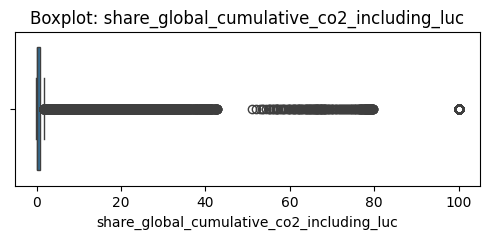

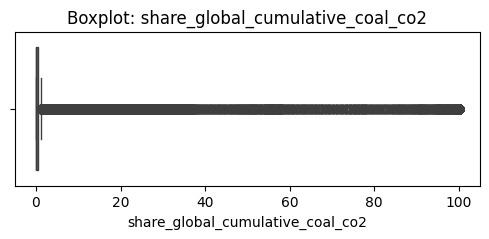

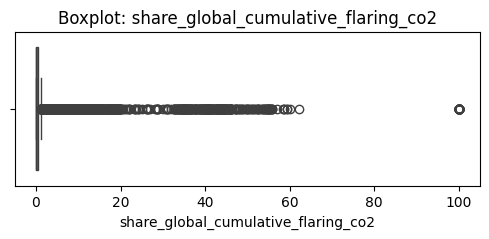

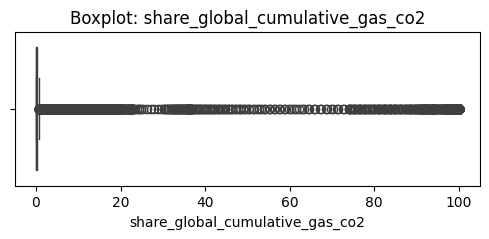

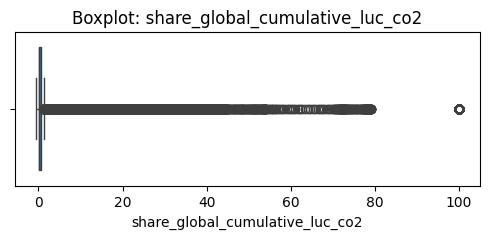

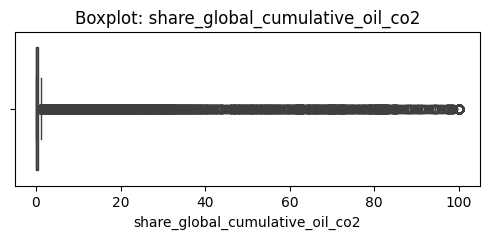

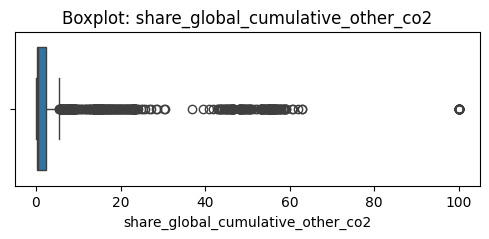

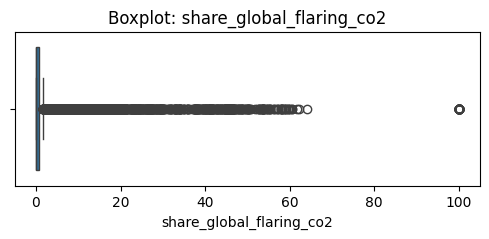

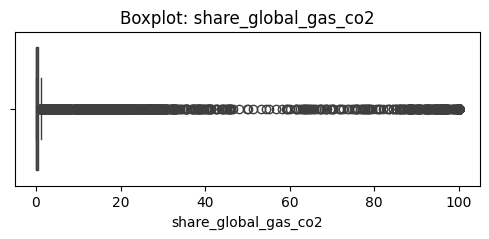

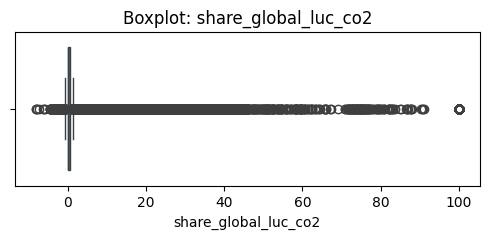

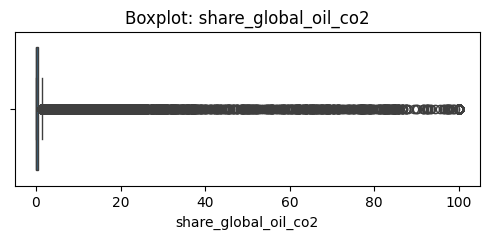

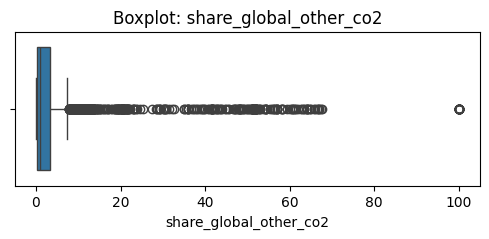

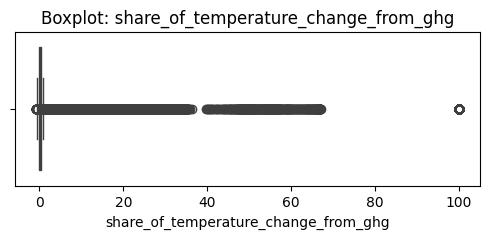

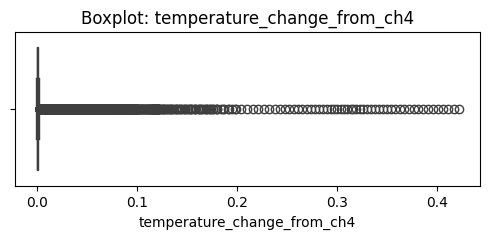

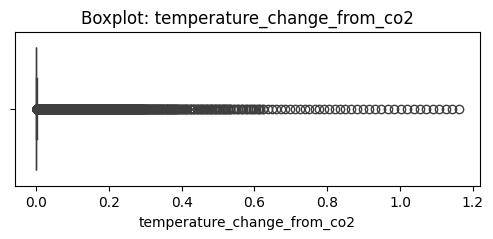

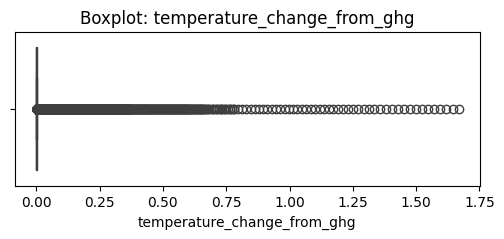

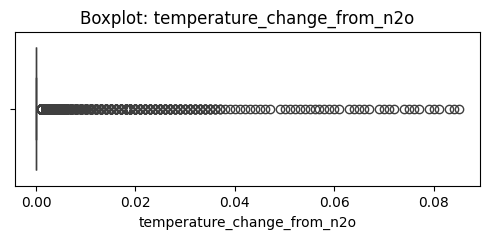

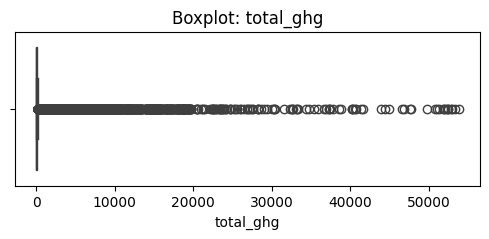

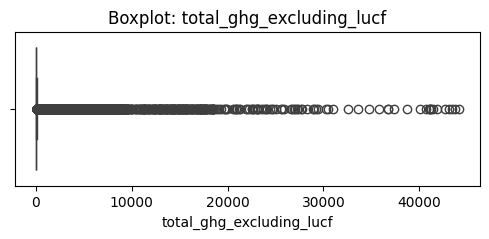

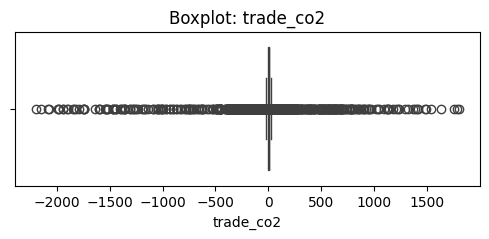

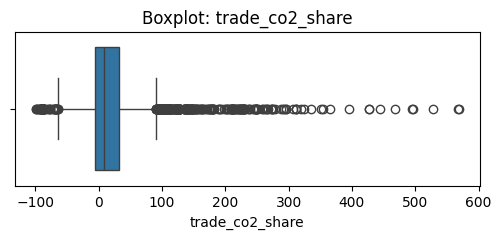

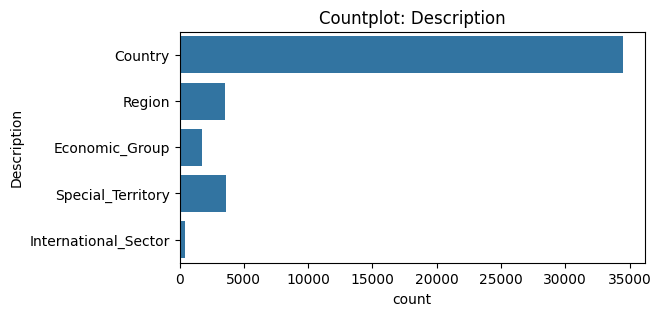

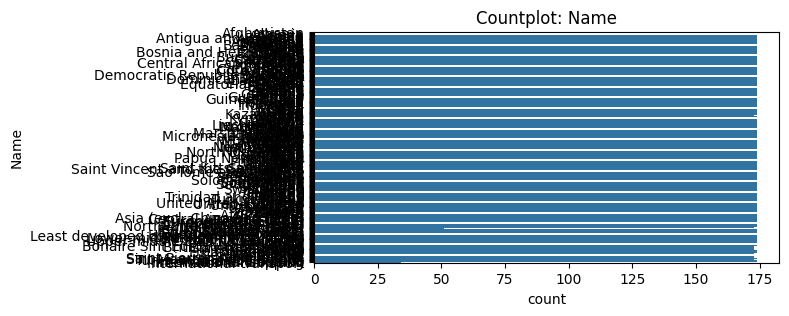

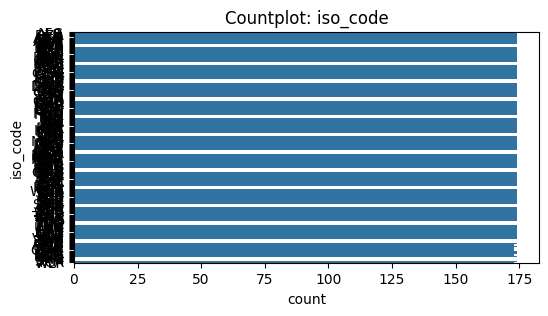

Using target column: trade_co2_share
Class distribution:


trade_co2_share
 0.000     116
-13.386      2
-5.973       2
-12.643      2
-0.649       2
          ... 
-9.122       1
-7.767       1
-7.156       1
-4.674       1
-6.835       1
Name: count, Length: 4319, dtype: int64

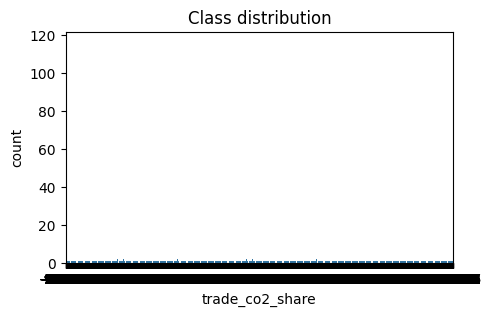

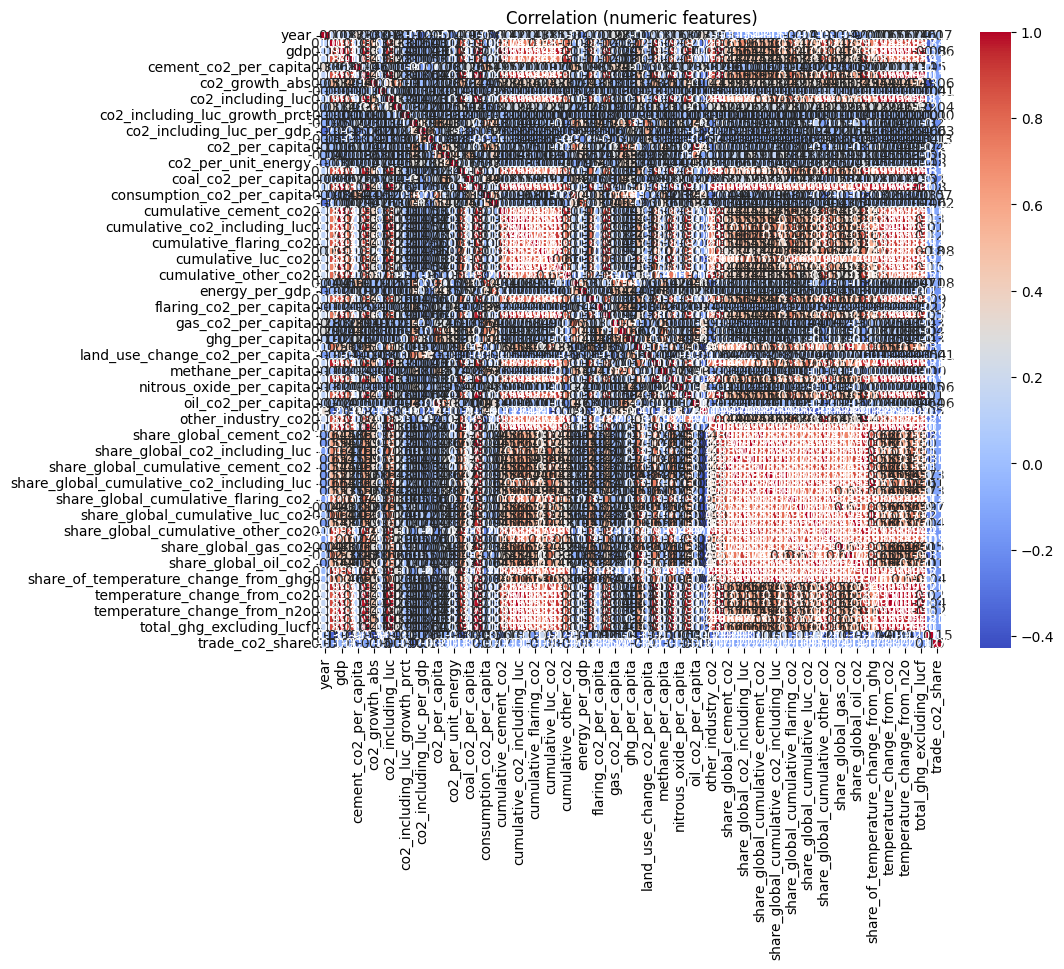

In [2]:
# Load dataset
df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH)
print("Shape:", df.shape)

# Basic inspection
display(df.head())
display(df.info())
display(df.describe(include='all').T)

# Missing values & datatypes
print("Missing values per column:")
display(df.isnull().sum())
print("\nData types:")
display(df.dtypes)

# Detect numeric and categorical cols
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric:", numeric_cols)
print("Categorical:", cat_cols)

# Histograms for numeric features
if len(numeric_cols) > 0:
    df[numeric_cols].hist(bins=20, figsize=(12, 6))
    plt.tight_layout()
    plt.show()

# Boxplots to inspect outliers (numeric)
for c in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot: {c}")
    plt.show()

# Countplots for categorical
for c in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=df[c])
    plt.title(f"Countplot: {c}")
    plt.show()

# Identify target column: prefer common names else default to last column
possible_targets = [c for c in df.columns if c.lower() in ['target','label','class','y','outcome','result']]
if len(possible_targets) > 0:
    target_col = possible_targets[0]
else:
    target_col = df.columns[-1]
print("Using target column:", target_col)

# Class balance
print("Class distribution:")
display(df[target_col].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x=df[target_col])
plt.title("Class distribution")
plt.show()

# Correlation heatmap for numeric features
if len(numeric_cols) >= 2:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation (numeric features)")
    plt.show()
else:
    print("Not enough numeric features for correlation heatmap.")

In [7]:
# Separate X and y
X = df.drop(columns=[target_col])
y = df[target_col]

# Drop rows with missing values in the target variable
nan_in_target = y.isnull()
if nan_in_target.any():
    print(f"Warning: Dropping {nan_in_target.sum()} rows with missing values in the target column '{target_col}'.")
    X = X[~nan_in_target]
    y = y[~nan_in_target]

# Recompute columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # handle missing numeric
    ('scaler', StandardScaler())                     # scale numeric
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),    # fill missing cats
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

# Train-test split (80/20). Use stratify if classification
# stratify_arg = y if len(np.unique(y))>1 else None # Removed stratification as it's not suitable for this target variable
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) # Removed stratify
print("Train/Test shapes:", X_train_raw.shape, X_test_raw.shape)

# Fit preprocessor on training data and transform both sets
X_train_pre = preprocessor.fit_transform(X_train_raw)
X_test_pre = preprocessor.transform(X_test_raw)
print("Preprocessed shapes:", X_train_pre.shape, X_test_pre.shape)

# Save feature name reconstruction utility (useful later)
# numeric_features come first; then one-hot feature names from the fitted encoder
ohe_feature_names = []
try:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for col, cats in zip(categorical_features, ohe.categories_[0]):
        for cat in cats:
            ohe_feature_names.append(f"{col}_{cat}")
except Exception:
    ohe_feature_names = []
feature_names = numeric_features + ohe_feature_names
print("Total preprocessed feature count:", len(feature_names))

Numeric features: ['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_

In [9]:
# Handle class imbalance on training set if needed (SMOTE is for classification, not regression)
# The target variable 'trade_co2_share' appears to be continuous, so SMOTE is not applicable here.
X_train_res, y_train_res = X_train_pre, y_train
print("Skipping SMOTE as the target variable is continuous.")

# Define regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE),
    "SVMRegressor": SVR(),
    "KNNRegressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=RANDOM_STATE),
    "XGBoostRegressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE)
}

# Train & evaluate regression models
results = []
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_pre)

    # Calculate and print regression metrics
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} — MSE:{mse:.4f} RMSE:{rmse:.4f} MAE:{mae:.4f} R2:{r2:.4f}")
    results.append({"model": name, "mse": mse, "rmse": rmse, "mae": mae, "r2": r2})

# Summarize results
results_df = pd.DataFrame(results).sort_values(by='r2', ascending=False)
display(results_df)
# Save results to Drive for report
results_df.to_csv('/content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/ml_model_results_regression.csv', index=False)
print("Saved ML regression results to Drive.")

Skipping SMOTE as the target variable is continuous.

Training LinearRegression ...
LinearRegression — MSE:695.8963 RMSE:26.3798 MAE:13.1908 R2:0.7529

Training DecisionTreeRegressor ...
DecisionTreeRegressor — MSE:221.2878 RMSE:14.8757 MAE:6.1156 R2:0.9214

Training RandomForestRegressor ...
RandomForestRegressor — MSE:146.5058 RMSE:12.1040 MAE:3.7150 R2:0.9480

Training SVMRegressor ...
SVMRegressor — MSE:2206.5613 RMSE:46.9740 MAE:21.8693 R2:0.2166

Training KNNRegressor ...
KNNRegressor — MSE:447.5750 RMSE:21.1560 MAE:9.4063 R2:0.8411

Training GradientBoostingRegressor ...
GradientBoostingRegressor — MSE:131.1755 RMSE:11.4532 MAE:7.0575 R2:0.9534

Training XGBoostRegressor ...
XGBoostRegressor — MSE:92.7295 RMSE:9.6296 MAE:3.7599 R2:0.9671


model          mse       rmse        mae        r2
6           XGBoostRegressor    92.729540   9.629618   3.759938  0.967079
5  GradientBoostingRegressor   131.175514  11.453188   7.057528  0.953430
2      RandomForestRegressor   146.505846  12.103960   3.714984  0.947987
1      DecisionTreeRegressor   221.287765  14.875744   6.115620  0.921437
4               KNNRegressor   447.574976  21.155968   9.406310  0.841100
0           LinearRegression   695.896261  26.379846  13.190838  0.752940
3               SVMRegressor  2206.561304  46.974049  21.869283  0.216617

Saved ML regression results to Drive.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,609 (205.50 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
97/97 - 3s - 32ms/step - loss: 2867.1428 - mae: 29.8521 - val_loss: 2473.3083 - val_mae: 28.6412
Epoch 2/100
97/97 - 1s - 6ms/step - loss: 2111.7185 - mae: 24.6337 - val_loss: 2071.6045 - val_mae: 26.1438
Epoch 3/100
97/97 - 1s - 6ms/step - loss: 1495.9709 - mae: 20.0571 - val_loss: 1627.4520 - val_mae: 24.5545
Epoch 4/100
97/97 - 1s - 6ms/step - loss: 1058.8894 - mae: 17.0673 - val_loss: 1136.7125 - val_mae: 21.3270
Epoch 5/100
97/97 - 1s - 6ms/step - loss: 883.7725 - mae: 15.8440 - val_loss: 948.9308 - val_mae: 19.8975
Epoch 6/100
97/97 - 1s - 6ms/step - loss: 759.4837 - mae: 14.8856 - val_loss: 575.6188 - val_mae: 13.1115
Epoch 7/100
97/97 - 1s - 6ms/step - loss: 702.5457 - mae: 14.6960 - val_loss: 639.5999 - val_mae: 15.4417
Epoch 8/100
97/97 - 1s - 6ms/step - loss: 581.4562 - mae: 13.8073 - val_loss: 564.1445 - val_mae: 14.3137
Epoch 9/100
97/97 - 1s - 6ms/step - loss: 559.5578 - mae: 13.8584 - val_loss: 443.4942 - val_mae: 12.2558
Epoch 10/100
97/97 - 1s - 6ms/step - 

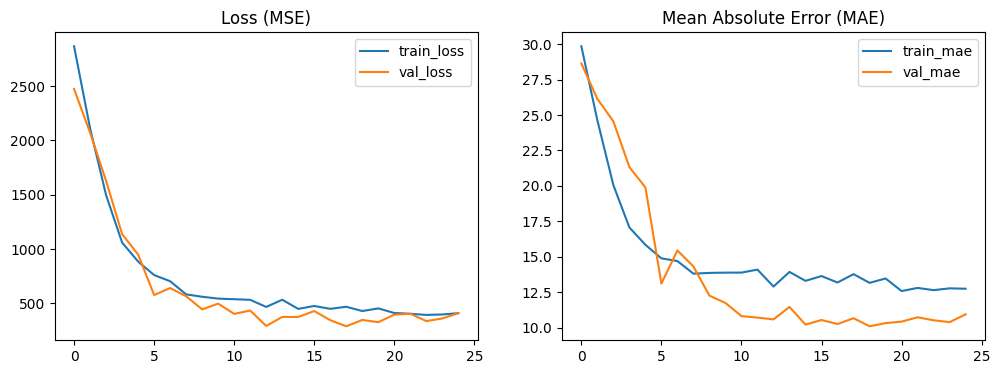

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MLP regression metrics:
MLP — MSE:324.3543 RMSE:18.0098 MAE:10.6994 R2:0.8848


In [11]:
# Build a simple MLP using Keras (good default for tabular)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder if not already imported

input_dim = X_train_res.shape[1]

def build_mlp(input_dim, layers=[128,64], dropout=0.3):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_dim,)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
    # output layer for regression
    model.add(Dense(1, activation='linear')) # Single output unit for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Use MSE loss and MAE metric for regression
    return model

mlp = build_mlp(input_dim, layers=[128,64], dropout=0.25)
mlp.summary()

# Prepare labels for training (regression)
# No need for LabelEncoder for regression, just ensure they are numpy arrays
y_train_keras = np.array(y_train_res)
y_test_keras = np.array(y_test)

# Train with early stopping
es = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
history = mlp.fit(X_train_res, y_train_keras, validation_split=0.15, epochs=100, batch_size=32, callbacks=[es], verbose=2)

# Plot training curves (adjusting for regression metrics)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title("Loss (MSE)")
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend(); plt.title("Mean Absolute Error (MAE)")
plt.show()

# Evaluate on test set
y_pred_mlp = mlp.predict(X_test_pre).flatten() # Flatten predictions for comparison

print("MLP regression metrics:")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test_keras, y_pred_mlp)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_keras, y_pred_mlp)
r2 = r2_score(y_test_keras, y_pred_mlp)

print(f"MLP — MSE:{mse:.4f} RMSE:{rmse:.4f} MAE:{mae:.4f} R2:{r2:.4f}")

feature  importance
75      f75    0.447523
16      f16    0.067158
21      f21    0.043512
51      f51    0.042807
43      f43    0.038439
20      f20    0.036713
73      f73    0.029141
61      f61    0.025459
74      f74    0.024609
15      f15    0.018598
198    f198    0.016014
5        f5    0.015340
54      f54    0.011769
58      f58    0.010307
263    f263    0.008740
134    f134    0.008349
80      f80    0.007415
19      f19    0.006780
23      f23    0.006758
153    f153    0.006356

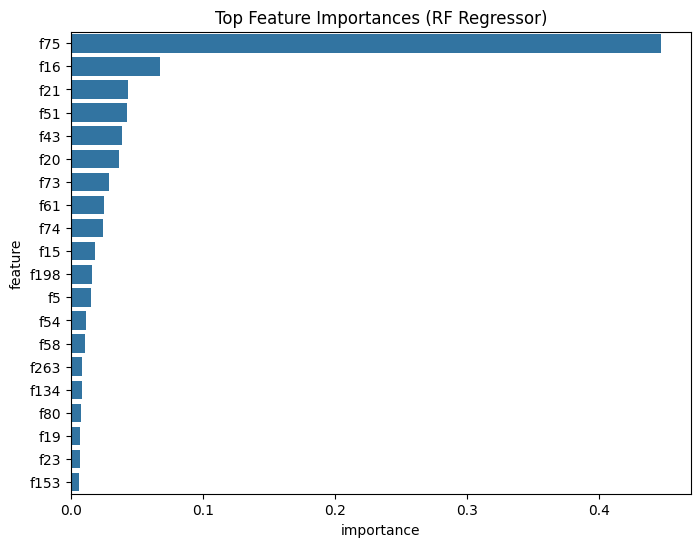

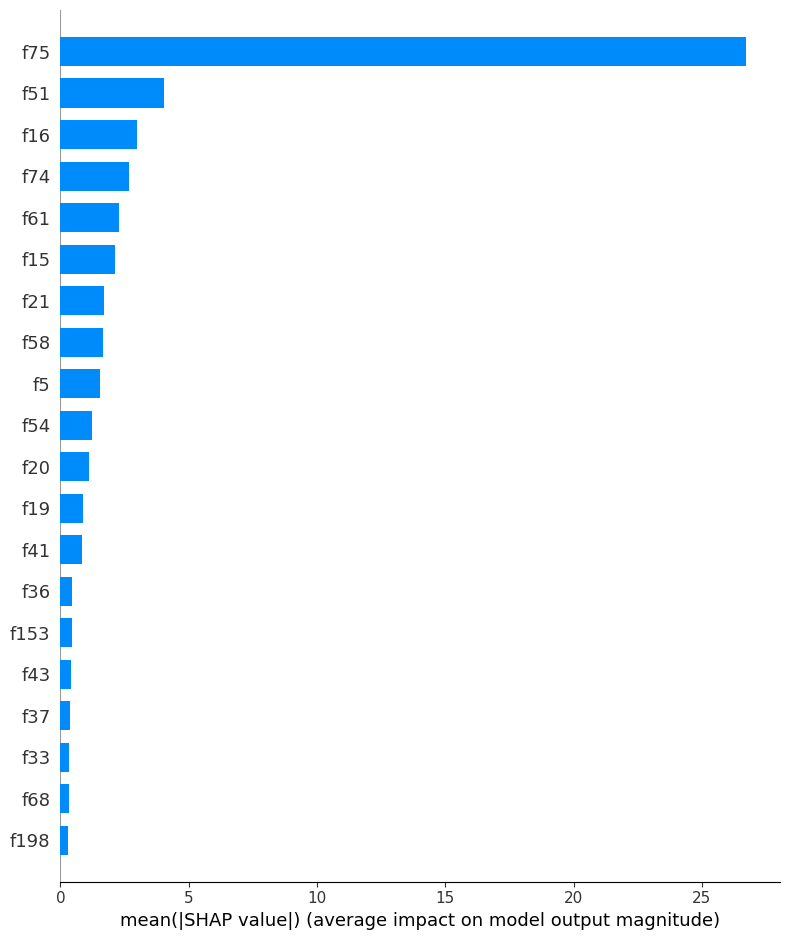

SHAP beeswarm plot error: too many indices for array: array is 1-dimensional, but 2 were indexed
LIME explanation error: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16
No suitable numeric features found automatically for PDP — you can manually specify.


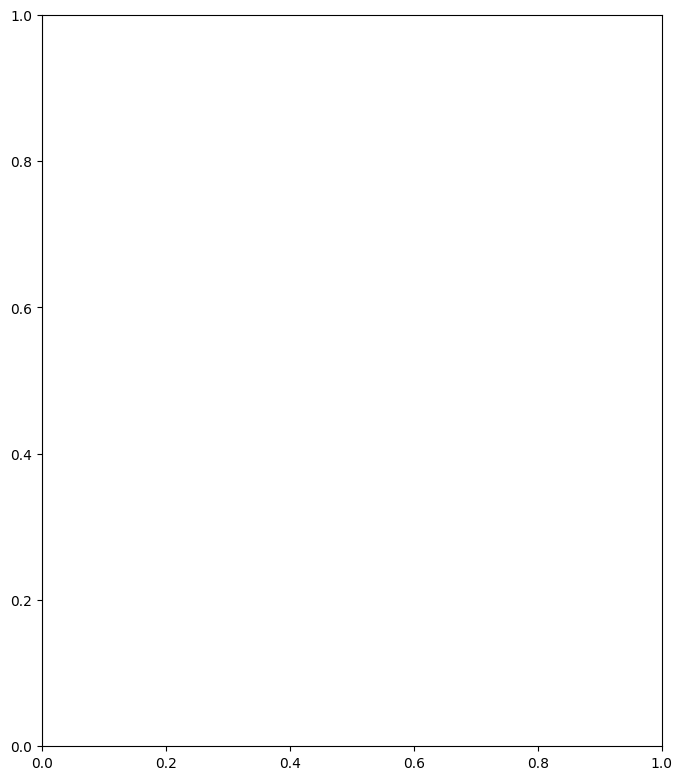

In [13]:
# Feature Importance: use RandomForestRegressor (if trained); fallback to train one
from sklearn.ensemble import RandomForestRegressor

rf = None
# Check if RandomForestRegressor was trained in the previous step (Cell Ym_df6UOCjki)
# Accessing models dictionary from the previous cell
if 'RandomForestRegressor' in globals().get('models', {}):
    rf = models['RandomForestRegressor']
else:
    # train a quick RF Regressor if not already trained
    print("Training a quick RandomForestRegressor for feature importance...")
    rf = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
    rf.fit(X_train_res, y_train_res)

# If rf was not trained in part 3, ensure it's fitted
try:
    _ = rf.feature_importances_
except Exception:
     print("Refitting RandomForestRegressor for feature importance...")
     rf.fit(X_train_res, y_train_res)

# Build feature name list (numeric then onehot names)
if len(feature_names) == X_train_pre.shape[1]:
    fname_list = feature_names
else:
    # best-effort fallback
    fname_list = [f"f{i}" for i in range(X_train_pre.shape[1])]

# Ensure fname_list matches the number of features
if len(fname_list) != X_train_res.shape[1]:
     print(f"Warning: Feature name list length ({len(fname_list)}) does not match training data features ({X_train_res.shape[1]}). Using generic names.")
     fname_list = [f"f{i}" for i in range(X_train_res.shape[1])]


fi = pd.DataFrame({'feature': fname_list, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False).head(20)
display(fi)
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=fi)
plt.title("Top Feature Importances (RF Regressor)")
plt.show()

# SHAP (TreeExplainer for tree models — sample for speed)
import shap
shap.initjs()
# Use TreeExplainer with the regression model
explainer = shap.TreeExplainer(rf)
sample_idx = np.random.choice(X_test_pre.shape[0], min(200, X_test_pre.shape[0]), replace=False)
X_shap = X_test_pre[sample_idx]

# Ensure X_shap is in the correct format for TreeExplainer if it's not already dense
if hasattr(X_shap, 'todense'):
    X_shap_dense = X_shap.todense()
else:
    X_shap_dense = X_shap

# Calculate SHAP values for regression
# SHAP values for regression are typically a single array, not a list for each class
shap_values = explainer.shap_values(X_shap_dense)

# summary plot (bar)
try:
    # For regression, shap_values is a single array
    shap.summary_plot(shap_values, X_shap_dense, feature_names=fname_list, plot_type="bar")
except Exception as e:
    print("SHAP bar plot error:", e)

# summary plot (beeswarm) - often more informative
try:
    shap.summary_plot(shap_values, X_shap_dense, feature_names=fname_list)
except Exception as e:
    print("SHAP beeswarm plot error:", e)


# LIME (local explanations)
from lime.lime_tabular import LimeTabularExplainer
# No class_names for regression
# Use rf.predict for regression
lime_explainer = LimeTabularExplainer(X_train_res, feature_names=fname_list, discretize_continuous=True)
i = 0  # explain test instance 0
# Use rf.predict for regression (returns single prediction, not probabilities)
# LimeTabularExplainer for regression expects a predict_fn that returns a single value or a 1D array
try:
    exp = lime_explainer.explain_instance(X_test_pre[i], rf.predict, num_features=8)
    print("LIME explanation (instance 0):")
    display(exp.as_list())
    # show in notebook (if supported)
    try:
        exp.show_in_notebook(show_table=True)
    except Exception:
        print("LIME show_in_notebook not supported in this environment.")
except Exception as e:
    print("LIME explanation error:", e)


# PDP / ICE plots for top numeric features (use sklearn)
from sklearn.inspection import PartialDependenceDisplay
# pick up to 2 top numeric features present in fname_list
pdp_targets = []
for f in fi['feature']:
    # Check if the feature is numeric and exists in the original numeric features list
    if f in numeric_features:
        pdp_targets.append(f)
    if len(pdp_targets) >= 2:
        break

# Map pdp_targets to indices in preprocessed array
pdp_indices = []
# Need to get the indices from the feature_names list
if 'feature_names' in globals() and len(feature_names) == X_train_pre.shape[1]:
    for t in pdp_targets:
        try:
            idx = feature_names.index(t)
            pdp_indices.append(idx)
        except ValueError:
            pass # Feature not found in the generated feature_names list
else:
     # Fallback: try to find indices based on original numeric features if feature_names is not reliable
     print("Warning: Using fallback for PDP indices as feature_names list is unavailable or mismatched.")
     for t in pdp_targets:
         try:
             idx = numeric_features.index(t)
             pdp_indices.append(idx)
         except ValueError:
             pass


# Ensure X_test_pre is in the correct format for PartialDependenceDisplay if it's sparse
if hasattr(X_test_pre, 'todense'):
    X_test_pre_dense = X_test_pre.todense()
else:
    X_test_pre_dense = X_test_pre

if pdp_indices:
    print(f"\nGenerating PDP/ICE plots for: {[fname_list[i] for i in pdp_indices]}")
    try:
        # Pass the regressor model and the dense test data
        PartialDependenceDisplay.from_estimator(rf, X_test_pre_dense, pdp_indices, kind='both', subsample=min(200, X_test_pre_dense.shape[0]))
        plt.suptitle("Partial Dependence / ICE Plots (RF Regressor)")
        plt.subplots_adjust(top=0.9) # Adjust title position
        plt.show()
    except Exception as e:
        print("PDP/ICE plot error:", e)
else:
    print("No suitable numeric features found automatically for PDP — you can manually specify.")

In [15]:
# Append DL (MLP) results to ML results table (if exists) and save final comparison table
try:
    # compute mlp metrics
    # Ensure y_test_keras and y_pred_mlp are numpy arrays for metric calculations
    y_test_keras_np = np.array(y_test_keras)
    y_pred_mlp_np = np.array(y_pred_mlp)

    # Regression metrics for MLP
    mlp_mse = mean_squared_error(y_test_keras_np, y_pred_mlp_np)
    mlp_rmse = np.sqrt(mlp_mse)
    mlp_mae = mean_absolute_error(y_test_keras_np, y_pred_mlp_np)
    mlp_r2 = r2_score(y_test_keras_np, y_pred_mlp_np)

    # Create a DataFrame row for MLP regression metrics
    mlp_row = {"model":"MLP", "mse": mlp_mse, "rmse": mlp_rmse, "mae": mlp_mae, "r2": mlp_r2}

    # Concatenate with the existing results_df
    # Make sure results_df exists, otherwise create it (though it should exist from Ym_df6UOCjki)
    if 'results_df' in globals():
        final_df = pd.concat([results_df, pd.DataFrame([mlp_row])], ignore_index=True, sort=False)
    else:
        # If results_df is somehow missing, just use the MLP result
        print("Warning: 'results_df' not found. Creating comparison table with only MLP results.")
        final_df = pd.DataFrame([mlp_row])

except Exception as e:
    print("Could not compute/append MLP metrics:", e)
    # Fallback: if MLP metrics computation fails, use the original results_df if it exists
    if 'results_df' in globals():
        final_df = results_df.copy()
    else:
        print("Error: Could not compute MLP metrics and 'results_df' is also missing.")
        final_df = pd.DataFrame() # Create an empty DataFrame if both fail


display(final_df.sort_values(by='r2', ascending=False)) # Sort by R2 for regression
final_df.to_csv('/content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/model_comparison_table.csv', index=False)
print("Saved comparative table to Drive.")

# Save important artifacts for deployment
import joblib
joblib.dump(preprocessor, '/content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/preprocessor.joblib')
# Save best tree model (rf) and MLP
joblib.dump(rf, '/content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/rf_model.joblib')
mlp.save('/content/drive/MyDrive/BTECH/3rd Year/5th Sem/Dataset/mlp_model.h5')
print("Saved preprocessor, RF model and MLP model to Drive.")

# Report checklist to include in PDF
report_checklist = [
    "Dataset overview: shape, columns, missing values",
    "EDA visuals: histograms, boxplots, countplots, correlation heatmap",
    "Preprocessing steps: encoding, scaling, imputation, train-test split",
    "Class imbalance handling: SMOTE/ADASYN details (if applied)",
    "ML model metrics table (Accuracy, Precision, Recall, F1, ROC-AUC)", # Update this description for regression metrics
    "DL model architecture, training curves, metrics, confusion matrix", # Update this description for regression metrics
    "XAI outputs: Feature Importance, SHAP, LIME, PDP/ICE",
    "Comparative analysis: ML vs DL, trade-offs, deployment recommendation",
    "Saved artifacts: preprocessor.joblib, rf_model.joblib, mlp_model.h5"
]
print("Report checklist:")
for it in report_checklist:
    print("-", it)

model          mse       rmse        mae        r2
0           XGBoostRegressor    92.729540   9.629618   3.759938  0.967079
1  GradientBoostingRegressor   131.175514  11.453188   7.057528  0.953430
2      RandomForestRegressor   146.505846  12.103960   3.714984  0.947987
3      DecisionTreeRegressor   221.287765  14.875744   6.115620  0.921437
7                        MLP   324.354318  18.009839  10.699409  0.884846
4               KNNRegressor   447.574976  21.155968   9.406310  0.841100
5           LinearRegression   695.896261  26.379846  13.190838  0.752940
6               SVMRegressor  2206.561304  46.974049  21.869283  0.216617

Saved comparative table to Drive.


Saved preprocessor, RF model and MLP model to Drive.
Report checklist:
- Dataset overview: shape, columns, missing values
- EDA visuals: histograms, boxplots, countplots, correlation heatmap
- Preprocessing steps: encoding, scaling, imputation, train-test split
- Class imbalance handling: SMOTE/ADASYN details (if applied)
- ML model metrics table (Accuracy, Precision, Recall, F1, ROC-AUC)
- DL model architecture, training curves, metrics, confusion matrix
- XAI outputs: Feature Importance, SHAP, LIME, PDP/ICE
- Comparative analysis: ML vs DL, trade-offs, deployment recommendation
- Saved artifacts: preprocessor.joblib, rf_model.joblib, mlp_model.h5
